## **abT and T.act gene clusters**

### 0. Preparing packages and files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Here I am loading a csv file with the genes Seda has filtered in a previous step. 

In [3]:
filtered_genes = pd.read_csv("gene_clusters_for_bobby.csv")

In [4]:
filtered_genes.head()

,Unnamed: 0,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,...,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,Cluster
0,0610007P14Rik,-0.532894,0.416132,0.464170,0.233545,0.589881,0.814989,-2.433693,-1.042701,-1.020798,...,0.381103,-0.467569,-1.162795,-1.277198,0.163418,0.397041,1.254970,0.105091,0.359435,7
1,0610009B22Rik,0.822623,1.427842,1.734718,0.385080,1.172709,1.520430,-0.658766,-0.895060,-0.518324,...,-0.594860,-0.980738,-0.638713,-0.807749,-0.638012,1.251433,1.275182,0.855159,1.173505,3
2,0610009O20Rik,1.418314,0.331641,1.283357,0.182180,0.111572,1.086558,-0.713267,-1.190163,-0.854242,...,-1.835612,-0.177767,-0.714778,-0.400902,-0.201551,1.680819,1.345800,1.283784,2.231347,1
3,0610010F05Rik,1.099021,2.896547,1.076246,0.704736,1.738721,1.372051,-0.384310,-0.616206,-0.872409,...,-0.184474,-0.726078,-1.091932,-0.849982,-0.433531,-0.114739,1.348479,0.542396,1.384638,3
4,0610010K14Rik,-0.785941,-0.334382,1.542094,1.078273,1.706792,1.543335,-2.273527,0.570376,0.427042,...,-0.098225,-1.639747,-1.002484,-1.138302,-1.338454,-0.724199,0.512724,-0.594804,-0.457518,3


In [13]:
filtered_genes.max()

Unnamed: 0                  l7Rn6
preT.DN1.Th              5.128006
preT.DN2a.Th             5.120662
preT.DN2b.Th              4.70031
preT.DN3.Th              5.259418
T.DN4.Th                 3.642666
T.ISP.Th                 3.870797
T.DP.Th                  5.290488
T.4.Th                   5.279249
T.8.Th                   4.403183
T.4.Nve.Sp               3.955485
T.4.Nve.Fem.Sp           3.771439
T.4.Sp.aCD3+CD40.18hr    5.266999
T.8.Nve.Sp               3.634643
Treg.4.25hi.Sp           5.099163
Treg.4.FP3+.Nrplo.Co     5.291439
T8.TN.P14.Sp             3.949755
T8.TE.LCMV.d7.Sp         5.126563
T8.MP.LCMV.d7.Sp         4.184439
T8.IEL.LCMV.d7.Gut       5.288823
T8.Tcm.LCMV.d180.Sp      4.351576
T8.Tem.LCMV.d180.Sp       4.76637
NKT.Sp                   4.561144
NKT.Sp.LPS.3hr           5.284431
NKT.Sp.LPS.18hr          5.217925
NKT.Sp.LPS.3d            5.289658
LTHSC.34-.BM             5.274383
LTHSC.34+.BM             5.135771
STHSC.150-.BM             4.03229
MPP4.135+.BM  

In [11]:
filtered_genes["Cluster"].unique()

array([ 7,  3,  1,  4, 10,  8,  6,  2,  5,  9])

In [5]:
print(filtered_genes.columns)

Index(['Unnamed: 0', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
       'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp',
       'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.Gut',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM',
       'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'Cluster'],
      dtype='object')


In [6]:
abT_Tact_cols = [
    'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th',
    'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
    'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.IEL.LCMV.d7.Gut', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d'
]

abT_Tact_df = filtered_genes[['Unnamed: 0'] + abT_Tact_cols + ['Cluster']].copy()
abT_Tact_df.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)

### 1. Defining abT and T.act gene clusters

<div align="justify">
This part of the notebook involves the definition of specific gene clusters whose expression is more tightly correlated with either abT or T.act cells. To do that, we will be using the 10 pre-defined clusters from the csv with the filtered genes. After calculating the mean expression of the clusters in each cell type, we will be able to compare the clusters to one another. 
</div>


Here I am calculating the mean expression in the different cell types for each cluster.

In [7]:
cluster_means = (
    abT_Tact_df
    .groupby("Cluster")[abT_Tact_cols]
    .mean()
)

In [8]:
cluster_means

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.TN.P14.Sp,T8.TE.LCMV.d7.Sp,T8.MP.LCMV.d7.Sp,T8.IEL.LCMV.d7.Gut,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d
Cluster,,,,,,,,,,,,,,,,,,,,,
1,0.553800,0.333206,0.042175,-0.014977,-0.142086,-0.223433,-0.224949,-0.240887,-0.353138,-0.199961,...,-0.195947,-0.559857,-0.444206,-0.606460,-0.265217,-0.345392,-0.284191,-0.470834,-0.111216,-0.237406
2,-0.015037,0.396746,0.920643,0.771636,0.729681,0.732254,0.946399,-0.397462,-0.259567,-0.337306,...,-0.327991,-0.014777,-0.225962,-0.385477,0.737595,1.386125,0.889422,-0.099750,-0.747861,0.218193
3,0.411052,0.846271,1.025413,1.318566,1.709670,1.719244,-0.382397,-0.338838,-0.195579,-0.495784,...,-0.452741,-0.235554,-0.374869,-0.337053,-0.459939,-0.529601,-0.570488,-0.494656,-0.182997,-0.538919
4,-0.547796,-0.645515,-0.579194,-0.536653,-0.607436,-0.522872,1.381813,0.644101,0.340120,0.680633,...,0.510715,0.073997,0.112630,0.052084,0.228872,0.277710,0.337715,-0.078682,-0.087512,0.143871
5,0.574528,1.306242,1.177387,0.173737,-0.857864,-1.051688,-0.395430,-0.038671,0.036875,1.072823,...,1.142185,-0.421498,0.038064,-0.294623,0.456801,-0.291929,0.221794,-0.684148,-0.538921,-0.459961
6,-0.636278,-0.267996,-0.130870,0.586758,0.706079,0.665549,-0.386063,0.188305,0.247975,0.974290,...,0.877668,-0.867030,-0.510540,-1.158608,0.272010,0.318778,-0.156460,-0.051696,0.107091,-0.230033
7,-0.382929,-0.315909,-0.359721,-0.366303,-0.168313,-0.184344,-0.710986,-0.515397,-0.344216,-0.338942,...,-0.142825,1.564424,1.183364,1.412855,0.608173,0.716817,-0.035879,-0.103305,-0.021679,0.155662
8,-0.277867,-0.329125,-0.355850,-0.348516,-0.365902,-0.345176,-0.197686,-0.013489,-0.186424,-0.149933,...,-0.219605,-0.167301,-0.154286,0.220923,-0.194554,-0.148178,0.011207,0.185945,0.171655,0.125996
9,-0.523474,-0.646487,0.382323,0.811728,0.364282,0.786551,1.316735,0.168552,-0.928926,-1.100462,...,-0.487449,0.796115,0.304022,0.237862,-0.042873,-0.124062,-0.782233,1.460399,0.470472,1.664642


In [ ]:
abT_cells = [
    'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
    'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th',  # thymic developmental stages
    'T.4.Th', 'T.8.Th',                 # mature CD4+ and CD8+ T cells in thymus
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp',     # naive CD4+ T cells in spleen
    'T.8.Nve.Sp',                       # naive CD8+ T cells in spleen
    'T8.TN.P14.Sp',                     # naive P14-specific CD8+ T cells
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp',  # central/memory CD8+ T
]

Tact_cells = [
    'T.4.Sp.aCD3+CD40.18hr',           # stimulated CD4+ T cells
    'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co',  # regulatory T cells
    'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',    # effector/memory CD8+ T
    'T8.IEL.LCMV.d7.Gut',                     # intraepithelial lymphocytes
    'NKT.Sp', 'NKT.Sp.LPS.3hr',
    'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d'        # NKT cells under LPS stimulation
]

In [10]:
abT_cluster_means = cluster_means[abT_cells].copy()
Tact_cluster_means = cluster_means[Tact_cells].copy()

Now we will calculate the difference in mean expression between T.act and abT cells of each cluster. We can also look for 

In [ ]:
diff = abT_cluster_means.mean(axis=1) - Tact_cluster_means.mean(axis=1)
cluster_means["abT_vs_Tact_diff"] = diff

In [23]:
cluster_means["abT_vs_Tact_diff"]

Cluster
1     0.264422
2     0.506689
3     0.530788
4     0.047071
5     0.583181
6     0.631754
7    -0.653599
8    -0.696375
9    -0.258103
10   -0.729449
Name: abT_vs_Tact_diff, dtype: float64

In [72]:
# Define thresholds for clusters that are more specific to one lineage
abT_like_clusters = cluster_means[diff > 0.5].index
Tact_like_clusters = cluster_means[diff < -0.5].index

print("abT-enriched clusters:", abT_like_clusters.tolist())
print("T.act-enriched clusters:", Tact_like_clusters.tolist())

abT_genes = filtered_genes.loc[filtered_genes["Cluster"].isin(abT_like_clusters), "Unnamed: 0"].tolist()
Tact_genes = filtered_genes.loc[filtered_genes["Cluster"].isin(Tact_like_clusters), "Unnamed: 0"].tolist()


abT-enriched clusters: [2, 3, 5, 6]
T.act-enriched clusters: [7, 8, 10]


### 2. Gene Ontology Enrichment

Gene ontology enrichment has to do with a genome-wide analysis of gene functions (Ashburner et al., 2000). It basically works like a dictionary, containing descriptions of gene functions/roles with each gene having a distinct GO identifier. 

We can use this to look into the role of the gene clusters we have attributed to either abT or T.act cells.

In [33]:
print(abT_genes[:20])

['0610009B22Rik', '0610010F05Rik', '0610010K14Rik', '0610012G03Rik', '1110004E09Rik', '1110004F10Rik', '1110038B12Rik', '1500009L16Rik', '1600002H07Rik', '1700017B05Rik', '1700037H04Rik', '1810014B01Rik', '1810022K09Rik', '1810026J23Rik', '2310022A10Rik', '2310061I04Rik', '2610301B20Rik', '2610318N02Rik', '2700029M09Rik', '2700038G22Rik']


In [34]:
from gprofiler import GProfiler

# Initialize g:Profiler
gp = GProfiler(return_dataframe=True)

# Extract gene names by cluster and convert index to list of strings
abT_genes = filtered_genes[filtered_genes["Cluster"].isin(abT_like_clusters)].index.astype(str).tolist()
Tact_genes = filtered_genes[filtered_genes["Cluster"].isin(Tact_like_clusters)].index.astype(str).tolist()

# Print counts to verify
print("abT genes:", len(abT_genes))
print("Tact genes:", len(Tact_genes))

# Run GO enrichment (organism = mouse)
go_abT = gp.profile(organism='mmusculus', query=abT_genes)
go_Tact = gp.profile(organism='mmusculus', query=Tact_genes)

# Optional: View top results
print(go_abT.head())
print(go_Tact.head())

abT genes: 2144
Tact genes: 1864
Empty DataFrame
Columns: [source, native, name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents]
Index: []
Empty DataFrame
Columns: [source, native, name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents]
Index: []


In [35]:
# Try a small subset directly to test lookup
test_genes = abT_genes[:10]  # or any 10 from your list
gp.profile(organism='mmusculus', query=test_genes)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents


In [42]:
abT_Tact_df.head()

,Gene,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,...,T8.TE.LCMV.d7.Sp,T8.MP.LCMV.d7.Sp,T8.IEL.LCMV.d7.Gut,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,Cluster
0,0610007P14Rik,-0.532894,0.416132,0.464170,0.233545,0.589881,0.814989,-2.433693,-1.042701,-1.020798,...,1.197358,0.471947,1.310536,0.401049,0.381103,-0.467569,-1.162795,-1.277198,0.163418,7
1,0610009B22Rik,0.822623,1.427842,1.734718,0.385080,1.172709,1.520430,-0.658766,-0.895060,-0.518324,...,-0.078143,-0.337680,-0.817115,-0.521017,-0.594860,-0.980738,-0.638713,-0.807749,-0.638012,3
2,0610009O20Rik,1.418314,0.331641,1.283357,0.182180,0.111572,1.086558,-0.713267,-1.190163,-0.854242,...,-0.829447,-0.419639,-0.213650,-0.851788,-1.835612,-0.177767,-0.714778,-0.400902,-0.201551,1
3,0610010F05Rik,1.099021,2.896547,1.076246,0.704736,1.738721,1.372051,-0.384310,-0.616206,-0.872409,...,-0.172662,-0.331301,-0.785590,-0.816572,-0.184474,-0.726078,-1.091932,-0.849982,-0.433531,3
4,0610010K14Rik,-0.785941,-0.334382,1.542094,1.078273,1.706792,1.543335,-2.273527,0.570376,0.427042,...,1.514489,0.979075,0.638845,0.104401,-0.098225,-1.639747,-1.002484,-1.138302,-1.338454,3


Apparently, the IDs of the analyzed genes are not suitable for our purposes. Therefore, the following code aims to convert them to proper IDs to which a function can be assigned in a later step. 

In [122]:
abT_filtered = abT_Tact_df[abT_Tact_df["Cluster"].isin(abT_like_clusters)]

gene_names_abT = abT_filtered["Gene"].tolist()

mapped_abT = gp.convert(organism="mmusculus", query=gene_names_abT)

In [49]:
print(mapped_abT.columns)
print(mapped_abT.head())

Index(['incoming', 'converted', 'n_incoming', 'n_converted', 'name',
       'description', 'namespaces', 'query'],
      dtype='object')
        incoming           converted  n_incoming  n_converted           name  \
0  0610009B22Rik                None           1            1           None   
1  0610010F05Rik                None           2            1           None   
2  0610010K14Rik  ENSMUSG00000020831           3            1  0610010K14Rik   
3  0610012G03Rik                None           4            1           None   
4  1110004E09Rik                None           5            1           None   

                                         description  \
0                                               None   
1                                               None   
2  RIKEN cDNA 0610010K14 gene [Source:MGI Symbol;...   
3                                               None   
4                                               None   

                           namespaces    quer

The first couple of rows contain multiple genes whose Riken ID could not be converted properly. Here is the total number of those genes:

In [68]:
print("# of unmatched gene names:", sum(mapped_abT["converted"]=="None"))
print("# of matched gene names:", sum(mapped_abT["converted"]!="None"))

# of unmatched gene names: 109
# of matched gene names: 2055


In [69]:
valid_abT_ids = mapped_abT[mapped_abT["converted"]!="None"]

In [70]:
valid_abT_ids.head()

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
2,0610010K14Rik,ENSMUSG00000020831,3,1,0610010K14Rik,RIKEN cDNA 0610010K14 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
5,1110004F10Rik,ENSMUSG00000030663,6,1,1110004F10Rik,RIKEN cDNA 1110004F10 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
6,1110038B12Rik,ENSMUSG00000092203,7,1,1110038B12Rik,RIKEN cDNA 1110038B12 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,WIKIGENE",query_1
7,1500009L16Rik,ENSMUSG00000087651,8,1,1500009L16Rik,RIKEN cDNA 1500009L16 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,WIKIGENE",query_1
9,1700017B05Rik,ENSMUSG00000032300,10,1,1700017B05Rik,RIKEN cDNA 1700017B05 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1


In [75]:
Tact_filtered = abT_Tact_df[abT_Tact_df["Cluster"].isin(Tact_like_clusters)]

gene_names_Tact = Tact_filtered["Gene"].tolist()

mapped_Tact = gp.convert(organism="mmusculus", query=gene_names_Tact)

print(mapped_Tact.columns)
print(mapped_Tact.head())

print("# of unmatched gene names:", sum(mapped_Tact["converted"]=="None"))
print("# of matched gene names:", sum(mapped_Tact["converted"]!="None"))

valid_Tact_ids = mapped_Tact[mapped_Tact["converted"]!="None"]
valid_Tact_ids.head()

Index(['incoming', 'converted', 'n_incoming', 'n_converted', 'name',
       'description', 'namespaces', 'query'],
      dtype='object')
        incoming           converted  n_incoming  n_converted           name  \
0  0610007P14Rik                None           1            1           None   
1  1110008P14Rik                None           2            1           None   
2  1110038F14Rik  ENSMUSG00000063236           3            1  1110038F14Rik   
3  1600014C10Rik  ENSMUSG00000054676           4            1  1600014C10Rik   
4  1700020I14Rik                None           5            1           None   

                                         description  \
0                                               None   
1                                               None   
2  RIKEN cDNA 1110038F14 gene [Source:MGI Symbol;...   
3  RIKEN cDNA 1600014C10 gene [Source:MGI Symbol;...   
4                                               None   

                           namespaces    quer

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
2,1110038F14Rik,ENSMUSG00000063236,3,1,1110038F14Rik,RIKEN cDNA 1110038F14 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,WIKIGENE",query_1
3,1600014C10Rik,ENSMUSG00000054676,4,1,1600014C10Rik,RIKEN cDNA 1600014C10 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
5,1700025G04Rik,ENSMUSG00000032666,6,1,1700025G04Rik,RIKEN cDNA 1700025G04 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
6,1700123O20Rik,ENSMUSG00000040822,7,1,1700123O20Rik,RIKEN cDNA 1700123O20 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
8,1810030O07Rik,ENSMUSG00000044148,9,1,1810030O07Rik,RIKEN cDNA 1810030O07 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1


In [80]:
go_results_abT = gp.profile(organism="mmusculus", query=valid_abT_ids["converted"].tolist())
go_results_Tact = gp.profile(organism="mmusculus", query=valid_Tact_ids["converted"].tolist())

In [81]:
go_results_abT.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0005622,intracellular anatomical structure,3.551799e-255,True,"""A component of a cell contained within (but n...",17520,2000,1906,27195,0.9530,0.108790,query_1,[GO:0110165]
1,GO:CC,GO:0043229,intracellular organelle,1.217750e-212,True,"""Organized structure of distinctive morphology...",15929,2000,1784,27195,0.8920,0.111997,query_1,"[GO:0005622, GO:0043226]"
2,GO:CC,GO:0005654,nucleoplasm,3.338558e-206,True,"""That part of the nuclear content other than t...",3894,2000,823,27195,0.4115,0.211351,query_1,"[GO:0031981, GO:0110165]"
3,GO:CC,GO:0043226,organelle,3.928383e-204,True,"""Organized structure of distinctive morphology...",16260,2000,1791,27195,0.8955,0.110148,query_1,[GO:0110165]
4,GO:CC,GO:0043231,intracellular membrane-bounded organelle,1.369230e-200,True,"""Organized structure of distinctive morphology...",14531,2000,1689,27195,0.8445,0.116234,query_1,"[GO:0043227, GO:0043229]"


In [118]:
# pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_colwidth", 50)

abT_summary = go_results_abT[["name", "p_value", "description", "precision", "recall", "intersection_size"]].sort_values("p_value")
abT_summary.head(n=10)

,name,p_value,description,precision,recall,intersection_size
0,intracellular anatomical structure,3.551799e-255,"""A component of a cell contained within (but n...",0.95300,0.108790,1906
1,intracellular organelle,1.217750e-212,"""Organized structure of distinctive morphology...",0.89200,0.111997,1784
2,nucleoplasm,3.338558e-206,"""That part of the nuclear content other than t...",0.41150,0.211351,823
3,organelle,3.928383e-204,"""Organized structure of distinctive morphology...",0.89550,0.110148,1791
4,intracellular membrane-bounded organelle,1.369230e-200,"""Organized structure of distinctive morphology...",0.84450,0.116234,1689
5,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,5.113163e-199,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,0.88218,0.140820,1797
6,membrane-bounded organelle,7.392109e-197,"""Organized structure of distinctive morphology...",0.85650,0.114002,1713
7,intracellular organelle lumen,3.626215e-196,"""An organelle lumen that is part of an intrace...",0.53650,0.165971,1073
8,membrane-enclosed lumen,4.153574e-196,"""The enclosed volume within a sealed membrane ...",0.53650,0.165945,1073
9,organelle lumen,4.153574e-196,"""The internal volume enclosed by the membranes...",0.53650,0.165945,1073


In [119]:
abT_bp = go_results_abT[(go_results_abT["source"] == "GO:BP")]
top_abT_bp = bp_only.sort_values("p_value").head(10)
top_abT_bp

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
20,GO:BP,GO:0007049,cell cycle,4.777339e-135,True,"""The progression of biochemical and morphologi...",1813,1990,463,26963,0.232663,0.255378,query_1,[GO:0009987]
24,GO:BP,GO:0022402,cell cycle process,2.756874e-131,True,"""The cellular process that ensures successive ...",1262,1990,377,26963,0.189447,0.298732,query_1,"[GO:0007049, GO:0009987]"
25,GO:BP,GO:0006259,DNA metabolic process,2.667619e-126,True,"""Any cellular metabolic process involving deox...",962,1990,322,26963,0.161809,0.334719,query_1,[GO:0090304]
26,GO:BP,GO:0044238,primary metabolic process,4.441782e-126,True,"""The chemical reactions and pathways involving...",12705,1990,1450,26963,0.728643,0.114128,query_1,[GO:0008152]
27,GO:BP,GO:0008152,metabolic process,4.952784e-122,True,"""A cellular process consisting of the biochemi...",14349,1990,1553,26963,0.780402,0.108231,query_1,[GO:0009987]
37,GO:BP,GO:0051276,chromosome organization,1.110179e-107,True,"""A process that is carried out at the cellular...",586,1990,233,26963,0.117085,0.397611,query_1,[GO:0006996]
39,GO:BP,GO:0000278,mitotic cell cycle,3.953742e-106,True,"""Progression through the phases of the mitotic...",854,1990,280,26963,0.140704,0.327869,query_1,[GO:0007049]
41,GO:BP,GO:1903047,mitotic cell cycle process,1.070676e-103,True,"""A process that is part of the mitotic cell cy...",721,1990,254,26963,0.127638,0.352288,query_1,"[GO:0000278, GO:0022402]"
45,GO:BP,GO:0009987,cellular process,1.302764e-100,True,"""Any process that is carried out at the cellul...",21509,1990,1909,26963,0.959296,0.088754,query_1,[GO:0008150]
55,GO:BP,GO:0006996,organelle organization,1.502438e-91,True,"""A process that is carried out at the cellular...",3489,1990,592,26963,0.297487,0.169676,query_1,[GO:0016043]


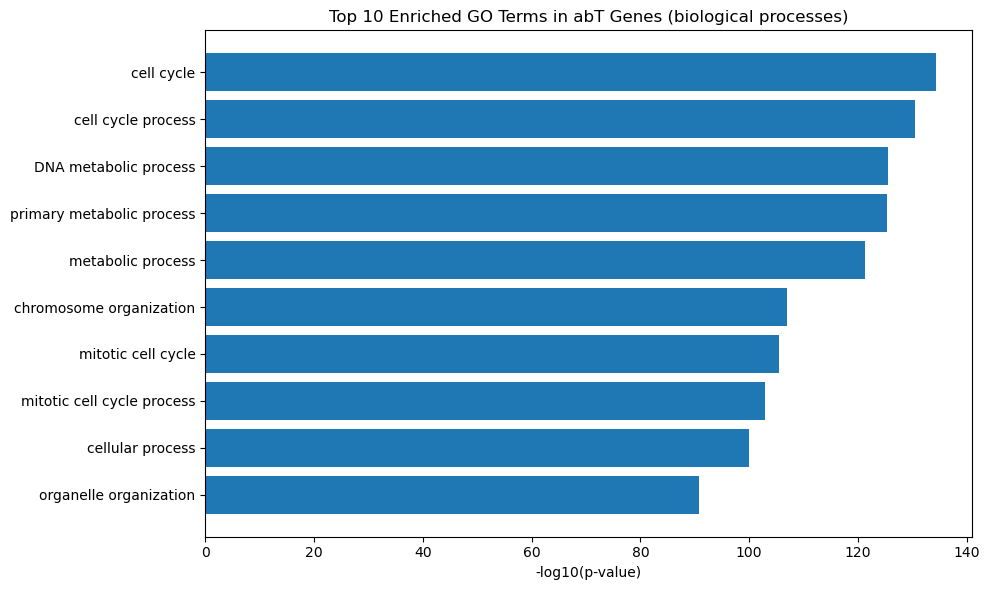

In [107]:
plt.figure(figsize=(10, 6))
plt.barh(top_abT_bp["name"], -np.log10(top_abT_bp["p_value"]))
plt.xlabel("-log10(p-value)")
plt.title("Top 10 Enriched GO Terms in abT Genes (biological processes)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
keywords = ["immune", "cytokine", "T cell", "activation", "differentiation", "signaling"]

def contains_keywords(df):
    return df[df["name"].str.contains('|'.join(keywords), case=False)]

In [123]:
immune_abT = contains_keywords(go_results_abT)
immune_Tact = contains_keywords(go_results_Tact)

In [124]:
abT_terms = set(immune_abT["name"])
Tact_terms = set(immune_Tact["name"])

unique_abT = abT_terms - Tact_terms
unique_Tact = Tact_terms - abT_terms


print("abT-specific terms:", unique_abT)
print("T.act-specific terms:", unique_Tact)

abT-specific terms: {'Beta-catenin independent WNT signaling', 'cell cycle checkpoint signaling', 'regulation of mitotic cytokinesis', 'DNA replication checkpoint signaling', 'Inactivation of APC/C via direct inhibition of the APC/C complex', 'regulation of stem cell differentiation', 'somatic diversification of immunoglobulins involved in immune response', 'mitotic cytokinesis', 'somatic diversification of immune receptors', 'Activation of the pre-replicative complex', 'Downstream signaling events of B Cell Receptor (BCR)', 'regulation of cytokinesis', 'AURKA Activation by TPX2', 'viral mRNA export from host cell nucleus', 'TCF dependent signaling in response to WNT', 'spindle assembly checkpoint signaling', 'mitotic DNA replication checkpoint signaling', 'mitotic spindle assembly checkpoint signaling', 'cytokinesis', 'Estrogen signaling', 'DNA integrity checkpoint signaling', 'somatic diversification of immune receptors via germline recombination within a single locus', 'Signaling by